In [1]:
#auto reload jupyter to update notebook w.r.t changes in other linked files:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr

In [3]:

file = "./Daten/se_atlantic_df.csv"
df = pd.read_csv(file)

df['time'] = pd.to_datetime(df['time'])

# aggregated_df=df.groupby(['time','lat','lon']).median().reset_index()
# ds = aggregated_df.set_index(['time','lat','lon']).to_xarray()


In [4]:
#Checking combinations of duplicate 'time','lat','lon' values before converting to xarray
print(f'length of df: {len(df)}')

counts=df.groupby(['time','lat','lon']).size().reset_index(name='count')
#print(f'count of rows {len(counts)}')

# #just to interpret results adding 'count' column values to original dataframe
# df_with_count = df.merge (counts [['time','lat','lon','count']], how='left', on=['time','lat','lon'])
# print(f'total rows in df {len(df_with_count)}')

duplicates=counts[counts['count'] > 1]
print (f'number of duplicates {len(duplicates)}')

# counts=df.groupby(['count'])
# print(counts)

aggregated_df=df.groupby(['time','lat','lon']).median().reset_index()
# aggregated_df

print(f'row count after aggregating duplicates: {len(aggregated_df)}')
# print(f'total row count : {len(df)}')
# print(f'row count after aggregating duplicates: {len(aggregated_df)}')


length of df: 326386
number of duplicates 60343
row count after aggregating duplicates: 257875


In [5]:
#converting to dataset
import xarray as xr
ds = aggregated_df.set_index(['time','lat','lon']).to_xarray()
#print(ds)

#Dataset Overview:
print(f"Dataset dimensions: {ds.dims}")
print(f"Dataset variables: {list(ds.data_vars)}")
print(f"Dataset coordinates: {list(ds.coords)}")


Dataset dimensions: FrozenMappingWarningOnValuesAccess({'time': 3070, 'lat': 16, 'lon': 16})
Dataset variables: ['clf', 'lwp', 'blh', 'cape', 'mlspf', 'mslhf', 'msshf', 'q700', 'q850', 'rh700', 'rh850', 'sst', 't700', 't850', 'tcwv', 'u10', 'u700', 'u850', 'v10', 'v700', 'v850', 'w700', 'w850', 'Terra_descending', 'lsm', 'eis', 'lnNd']
Dataset coordinates: ['time', 'lat', 'lon']


In [6]:
print(f" The measurements range from First date: {ds.time[0].values}, to Last date {ds.time[-1].values}")

 The measurements range from First date: 2011-01-02T00:00:00.000000000, to Last date 2019-12-31T00:00:00.000000000


In [7]:
#some data exploration of clf and lwp:

# Basic statistics
print(f"Mean of 'clf': {ds['clf'].mean().values}")
print(f"Standard deviation of 'clf': {ds['clf'].std().values}")
print(f"Minimum of 'clf': {ds['clf'].min().values}")
print(f"Maximum of 'clf': {ds['clf'].max().values}")

print(f"Mean of 'lwp': {ds['lwp'].mean().values}")
print(f"Standard deviation of 'lwp': {ds['lwp'].std().values}")
print(f"Minimum of 'lwp': {ds['lwp'].min().values}")
print(f"Maximum of 'lwp': {ds['lwp'].max().values}")



Mean of 'clf': 0.6788431205424438
Standard deviation of 'clf': 0.31677787155480447
Minimum of 'clf': 0.0030999998562037
Maximum of 'clf': 1.0
Mean of 'lwp': 78.9566999515269
Standard deviation of 'lwp': 42.894765027262885
Minimum of 'lwp': 25.0
Maximum of 'lwp': 431.0


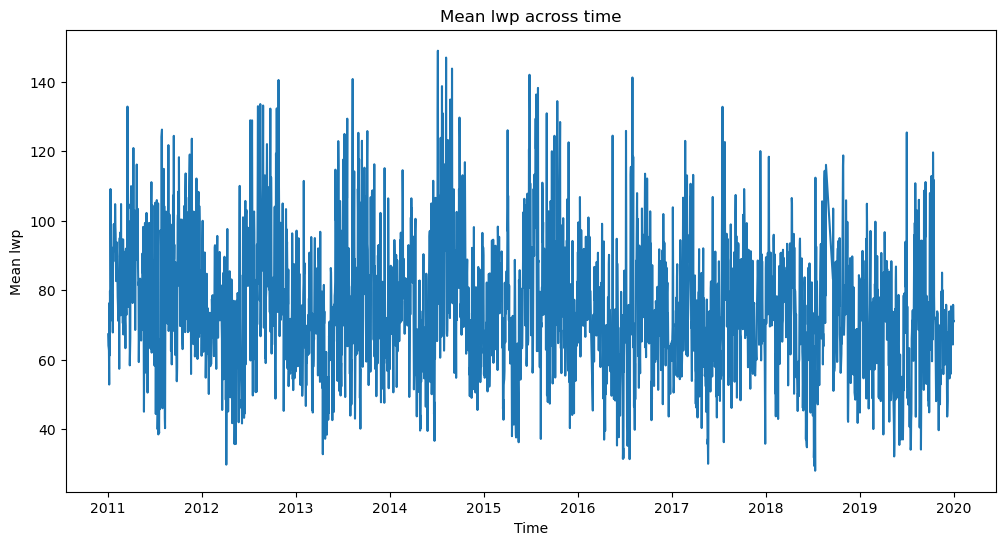

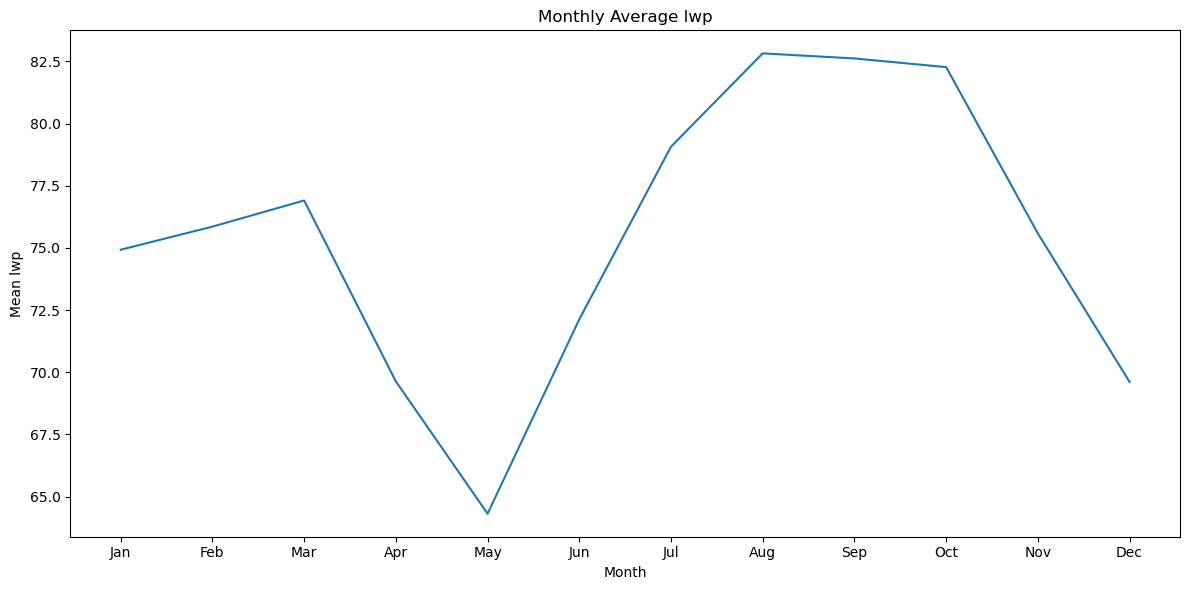

In [12]:
from pre_plot import PlotData

# clf_plot=PlotData(ds=ds)
# clf_plot.temporalplot2(column='clf')

plot_obj=PlotData(ds=ds)

plot_obj.temporalplot2(column='lwp')

plot_obj.temporalplot_grouped(column='lwp', groupby='monthly')
#plot_obj.spatialplot(column='lwp')



Analysing the spatial distribution of lwp. There is some seasonality in the distribution where the values are lowest around May. The lwp  steadily increases after that till August, it stays highest from August to October and then decreases.

In [9]:
#TODO - Fix time series decomposition function. Results seem incorrect, esp. seasonality

#PlotData.ts_decompose(df, 'lwp')

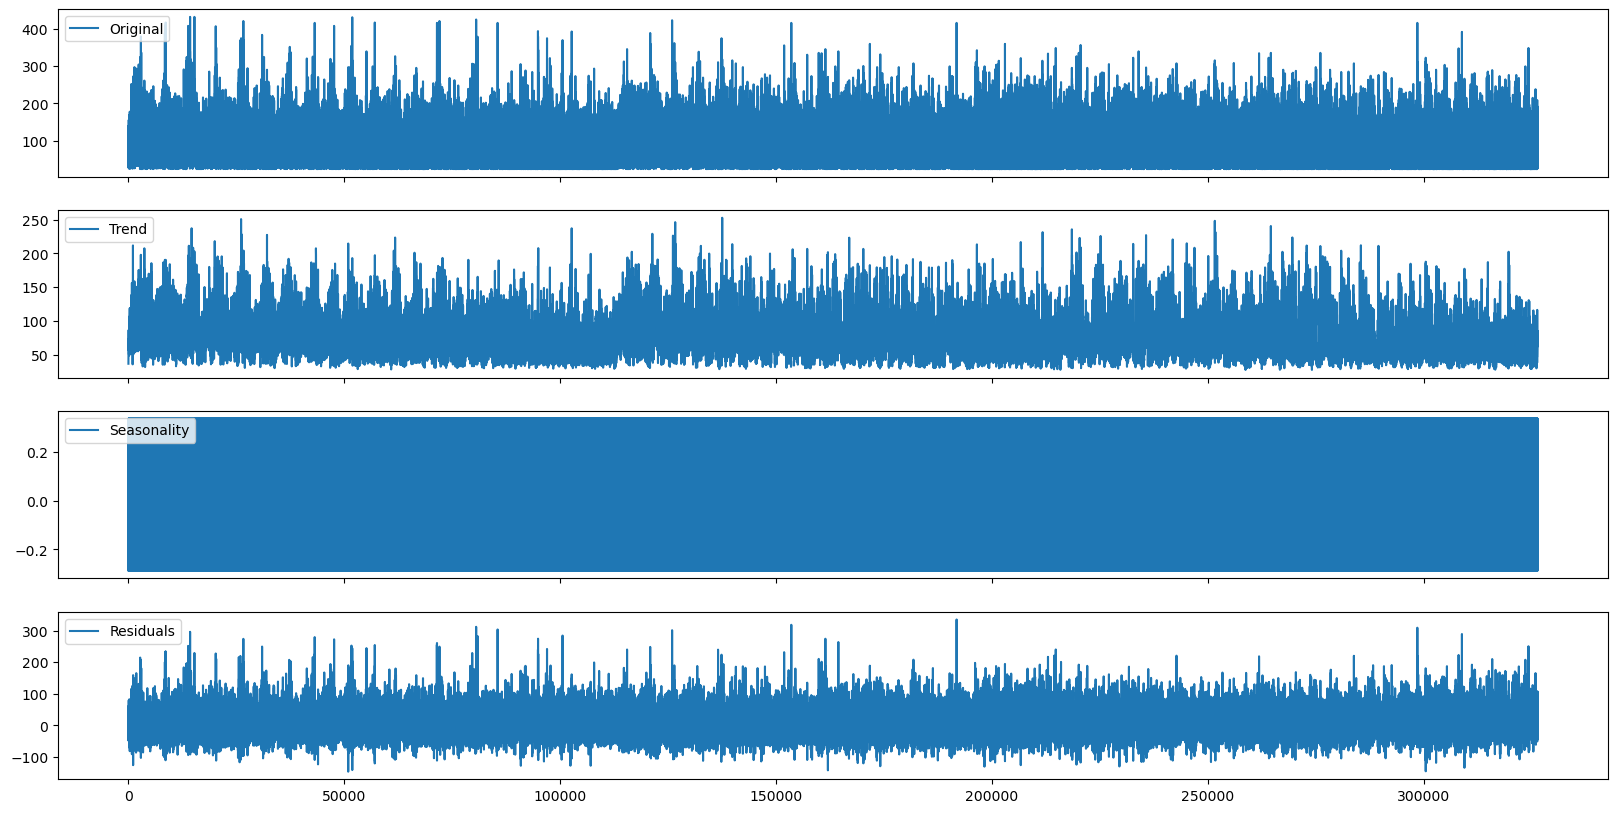

In [10]:
PlotData.ts_decompose(df, 'lwp')

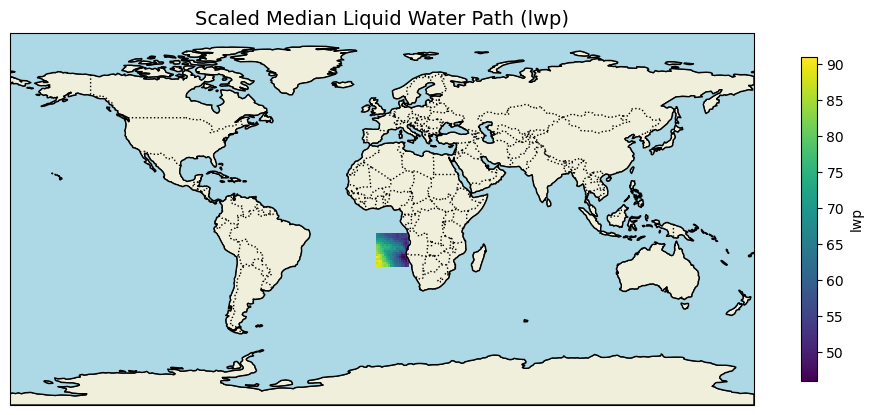

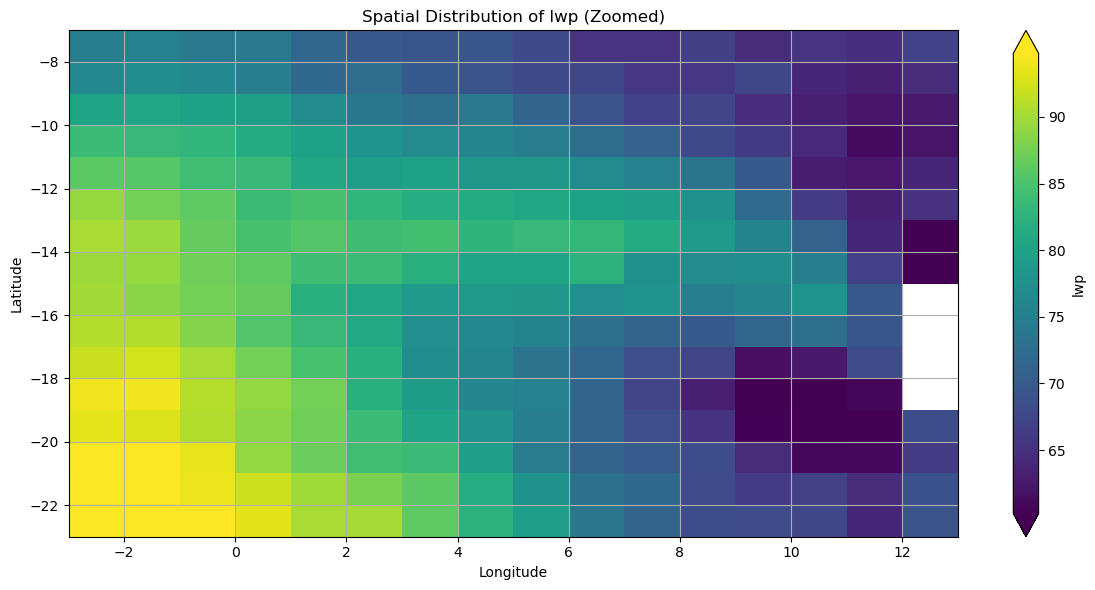

In [11]:
from pre_plot import PlotData

PlotData.plot_variable_on_map(ds, 'lwp', 'Scaled Median Liquid Water Path (lwp)', time_agg='median')

plot_obj.spatialplot(column='lwp')

The Lwp values are highest in the north-east part of the study area. Along the coasts of Angola and Namibia.